In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data_csv = pd.read_csv('./data/data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 2018-11-10 23:00:00 to 2018-11-24 23:00:00
Data columns (total 1 columns):
temperature    337 non-null float64
dtypes: float64(1)
memory usage: 5.3 KB


In [3]:
data.tail(5)

,temperature
dateTime,
2018-11-24 19:00:00,15.5025
2018-11-24 20:00:00,16.6650
2018-11-24 21:00:00,17.1150
2018-11-24 22:00:00,16.9675
2018-11-24 23:00:00,16.6550


In [4]:
y = data

In [5]:
# The 'MS' string groups the data in buckets by start of the month
y = y['temperature'].resample('H').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

dateTime
2018-11-10 23:00:00    20.554000
2018-11-11 00:00:00    21.200256
2018-11-11 01:00:00    20.132500
2018-11-11 02:00:00    18.845000
2018-11-11 03:00:00    19.197500
2018-11-11 04:00:00    18.700000
2018-11-11 05:00:00    19.440000
2018-11-11 06:00:00    19.295000
2018-11-11 07:00:00    19.072500
2018-11-11 08:00:00    18.967500
2018-11-11 09:00:00    18.822500
2018-11-11 10:00:00    18.942500
2018-11-11 11:00:00    19.755000
2018-11-11 12:00:00    18.195000
2018-11-11 13:00:00    18.755000
2018-11-11 14:00:00    18.602500
2018-11-11 15:00:00    19.700000
2018-11-11 16:00:00    20.917500
2018-11-11 17:00:00    21.147500
2018-11-11 18:00:00    21.280000
2018-11-11 19:00:00    20.365000
2018-11-11 20:00:00    21.117500
2018-11-11 21:00:00    19.154000
2018-11-11 22:00:00    19.215000
2018-11-11 23:00:00    19.087500
2018-11-12 00:00:00    20.250000
2018-11-12 01:00:00    20.970000
2018-11-12 02:00:00    21.510000
2018-11-12 03:00:00    20.922500
2018-11-12 04:00:00    20.835000
 

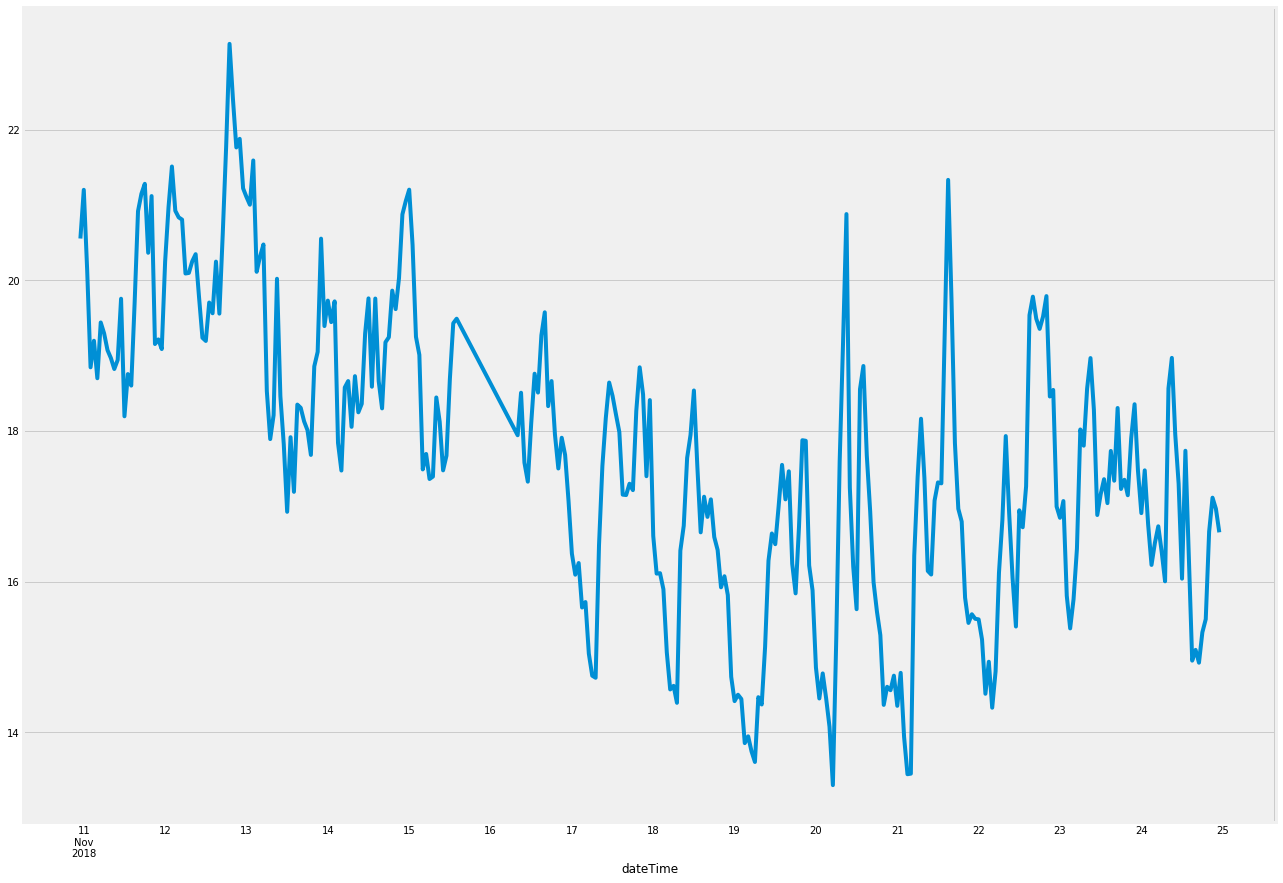

In [50]:
y.plot(figsize=(20, 15))
plt.show()

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:2891.65646649726
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:2348.1687212439524
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:1184.5637910371981
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1072.6384250562623
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:1178.7224304674914
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1140.7885348406585
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1077.9452359833217
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1074.2877121160498
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:2440.272503085056
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:1942.7301969595267
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:1005.9136493549125
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:889.3756117487574
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:1004.1824783785329
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:945.1189965012325
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:903.4351870721297
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:898.151448144724
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:838.2664240894406
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:774.8880843480987
AR

In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        temperature   No. Observations:                  337
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 24)   Log Likelihood                -364.083
Date:                            Sun, 25 Nov 2018   AIC                            736.165
Time:                                    01:13:17   BIC                            750.789
Sample:                                11-10-2018   HQIC                           742.027
                                     - 11-24-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8068      0.039     20.468      0.000       0.730       0.884
ma.L1         -0.9701      0.025   

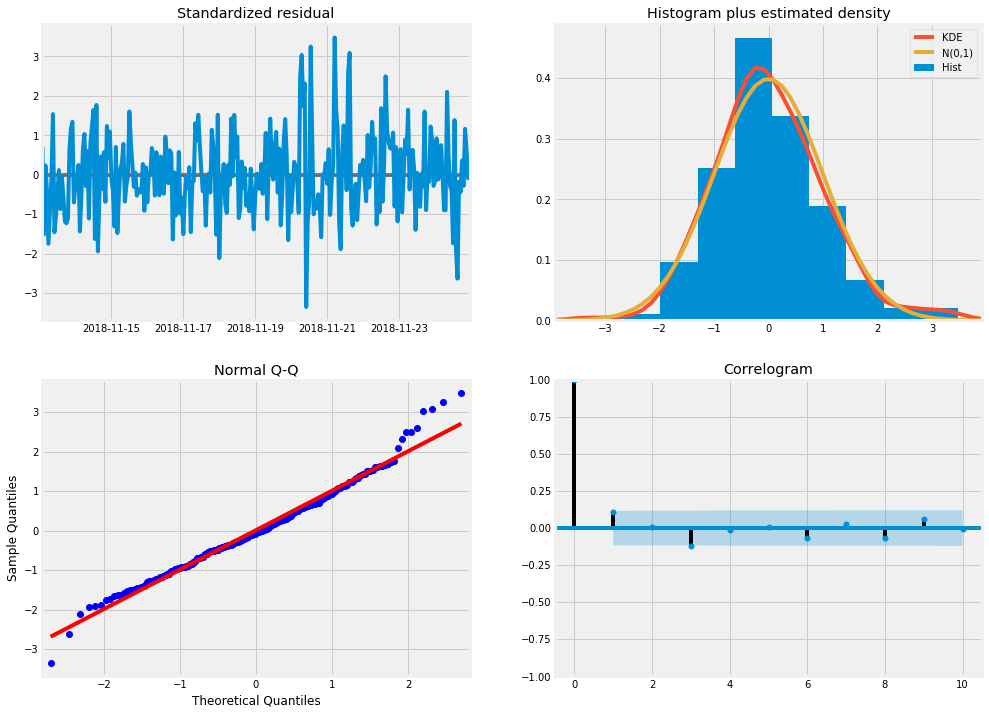

In [10]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-12 03:00:00'), dynamic=False)
pred_ci = pred.conf_int()

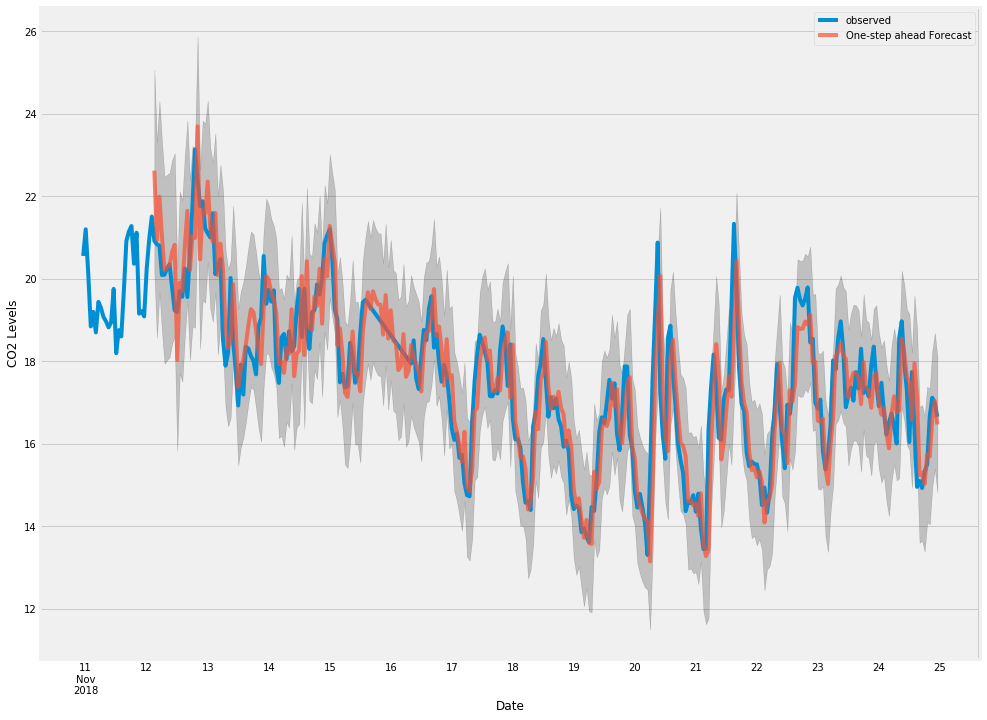

In [22]:
ax = y.plot(label='observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-11-11 03:00:00':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.77


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-11-24 03:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

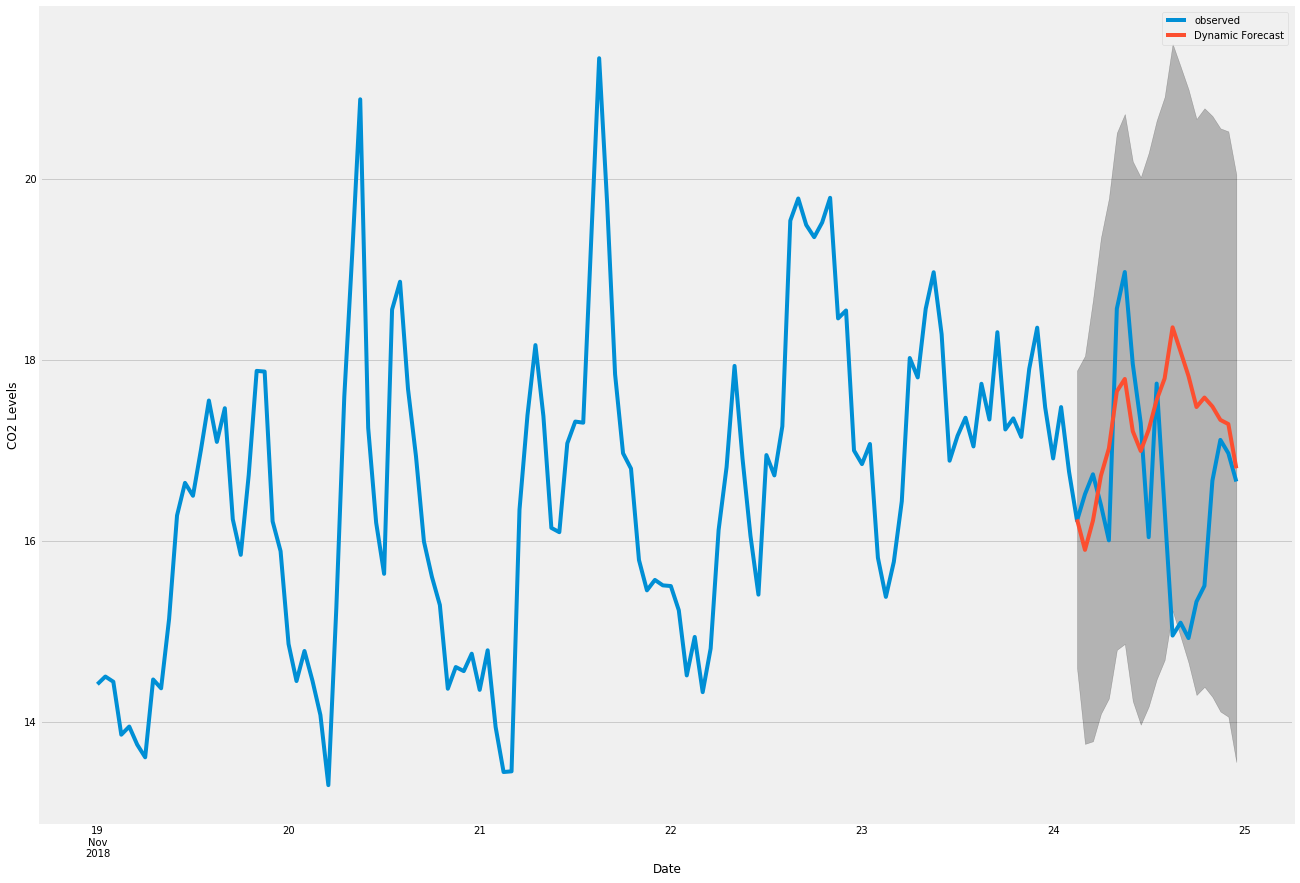

In [36]:
ax = y.last('W').plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-12-11 03:00:00'), y.index[-1],
                 #alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [37]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-11-19':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.24


In [48]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

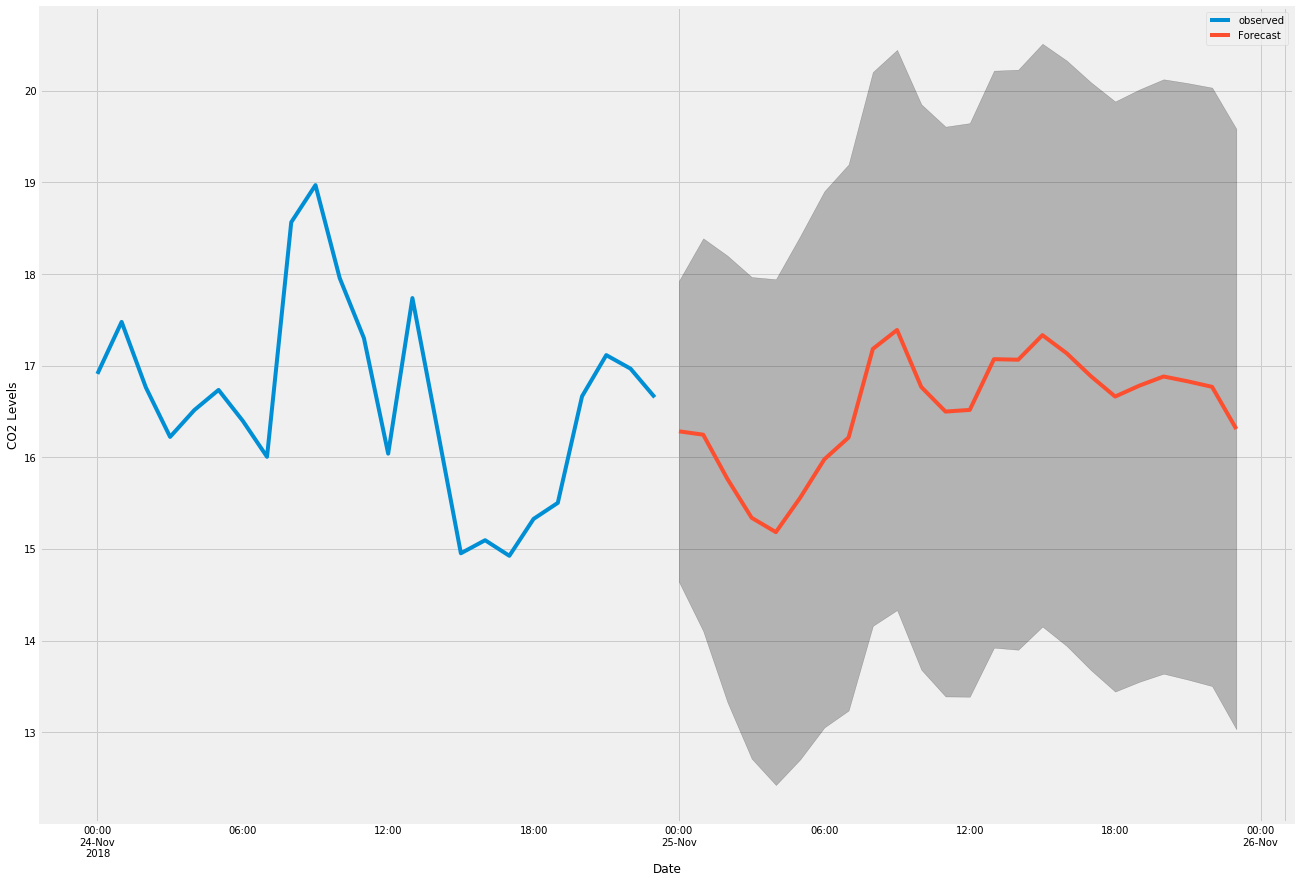

In [49]:
ax = y.last('D').plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()